## Observations and Insights 

The following tables and charts describe tumor development on mice receiving a variety of treatments. From this information, several top-level analyses can be determined:

   1. Based on the drug summary table, we can see that mice treated with Capomulin and Ramicane have the smallest tumors. Additionally these drug regimens show the smallest deviation between test subjects, suggesting tumor development was more consistent with these mice.
   
   2. Our box plots re-affirm these findings. The top 4 drug regimens appear to be Capomulin, Ramicane, Infubinol, and Ceftamin. However, in most cases, Capomulin and Ramicane saw final tumor sizes 20 mm3 smaller than those seen in Infubinol and Ceftamin. There was one mouse treated with Infubinol that saw a final tumor size more in line with those treated by Capomulin and Ramicane; however, it was found to be an outlier, and therefore does not reflect the overall Infubinol data.
   
   3. Finally, when comparing mouse weight with tumor weight (specifically looking at mice treated with Capomulin), there was a strong, positive, linear correlation. In fact, when weight went up by 1g, tumor volume increased by nearly 1 mm3.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [2]:
# Checking the number of mice.
num_mice = mouse_df['Mouse ID'].nunique()
num_mice

249

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
# Create an array of index values associated with Mouse IDs showing duplicate Timepoints.
duplicate_mice = mouse_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)
duplicate_mice_index = duplicate_mice[duplicate_mice].index.values

# Convert array to a list
duplicate_mice_index = duplicate_mice_index.tolist()
duplicate_mouse_id = []

# Find Mouse ID associated with each index value
for mouse in duplicate_mice_index:
    duplicate_mouse_id.append(mouse_df.iloc[mouse,0])

# This list will always contain data in pairs, so drop duplicates within the list
duplicate_mouse_id = list(dict.fromkeys(duplicate_mouse_id))
    
# List of duplicate mice by ID number
duplicate_mouse_id

['g989']

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicate_summary = mouse_df.loc[mouse_df['Mouse ID'] == 'g989']
duplicate_summary

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
for item in duplicate_mouse_id:
    mouse_df = mouse_df.loc[mouse_df["Mouse ID"] != "g989"]
mouse_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [6]:
# Checking the number of mice in the clean DataFrame.
num_mice = mouse_df['Mouse ID'].nunique()
num_mice

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
tumor_mean = mouse_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').mean()
tumor_median = mouse_df[['Drug Regimen','Tumor Volume (mm3)']].groupby('Drug Regimen').median()
tumor_variance = mouse_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').var()
tumor_std = mouse_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').std()
tumor_sem = mouse_df[['Drug Regimen', 'Tumor Volume (mm3)']].groupby('Drug Regimen').sem()

drug_summary = pd.merge(tumor_mean, tumor_median, on='Drug Regimen')
drug_summary = drug_summary.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume (mm3) Mean',
                                            'Tumor Volume (mm3)_y':'Tumor Volume (mm3) Median'})
drug_summary = pd.merge(drug_summary, tumor_variance, on='Drug Regimen')
drug_summary = pd.merge(drug_summary, tumor_std, on='Drug Regimen')
drug_summary = pd.merge(drug_summary, tumor_sem, on='Drug Regimen')

drug_summary = drug_summary.rename(columns={'Tumor Volume (mm3)_x':'Tumor Volume (mm3) Variance',
                                            'Tumor Volume (mm3)_y':'Tumor Volume (mm3) STD',
                                            'Tumor Volume (mm3)':'Tumor Volume (mm3) SEM'})

drug_summary

# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Tumor Volume (mm3) Mean,Tumor Volume (mm3) Median,Tumor Volume (mm3) Variance,Tumor Volume (mm3) STD,Tumor Volume (mm3) SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

Text(0, 0.5, 'Number of Rounds')

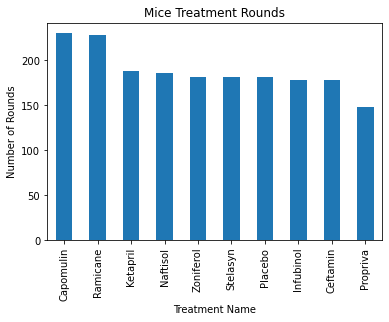

In [8]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
mouse_df["Drug Regimen"].value_counts().plot(kind="bar")

# Set title and labels
plt.title("Mice Treatment Rounds")
plt.xlabel("Treatment Name")
plt.ylabel("Number of Rounds")

Text(0, 0.5, 'Number of Rounds')

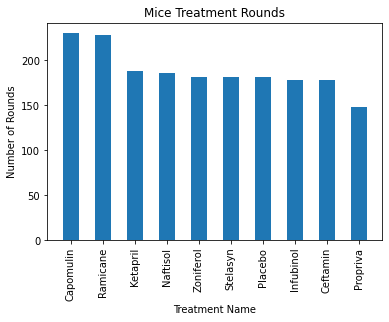

In [9]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.
treatment_counts = mouse_df["Drug Regimen"].value_counts()
num_treatments = np.arange(len(treatment_counts))

plt.bar(list(treatment_counts.index), treatment_counts, align='center', width=0.5)

# Tell matplotlib where we would like to place each of our treatment names
tick_locations = [value for value in num_treatments]
plt.xticks(tick_locations, rotation="vertical")

# Set title and labels
plt.title("Mice Treatment Rounds")
plt.xlabel("Treatment Name")
plt.ylabel("Number of Rounds")

Text(0.5, 1.0, 'Gender Distribution of Mice')

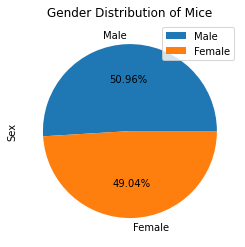

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
mouse_sex = mouse_df[["Mouse ID", "Sex"]]
mouse_df["Sex"].value_counts().plot(kind="pie",autopct="%1.2f%%",legend="right")

# Set title and labels
plt.title("Gender Distribution of Mice")

Text(0.5, 1.0, 'Gender Distribution of Mice')

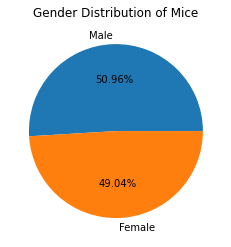

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
treatments = mouse_df["Sex"].unique()
treatment_counts = mouse_df["Sex"].value_counts()

plt.pie(treatment_counts, labels=treatments, autopct="%1.2f%%")

# Set title and labels
plt.title("Gender Distribution of Mice")

## Quartiles, Outliers and Boxplots

In [12]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
last_timepoint = mouse_df.groupby('Mouse ID')["Timepoint"].max()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merged_by_last_timepoint = pd.merge(last_timepoint, mouse_df, on=["Mouse ID", "Timepoint"])
merged_by_last_timepoint.head()

,Mouse ID,Timepoint,Drug Regimen,Sex,Age_months,Weight (g),Tumor Volume (mm3),Metastatic Sites
0,a203,45,Infubinol,Female,20,23,67.973419,2
1,a251,45,Infubinol,Female,21,25,65.525743,1
2,a262,45,Placebo,Female,17,29,70.717621,4
3,a275,45,Ceftamin,Female,20,28,62.999356,3
4,a366,30,Stelasyn,Female,16,29,63.440686,1


In [13]:
# Generate a data frame for mice from all four top treatments
top_treatment_df = merged_by_last_timepoint.loc[(merged_by_last_timepoint["Drug Regimen"] == "Capomulin") | 
                                                (merged_by_last_timepoint["Drug Regimen"] == "Ramicane") | 
                                                (merged_by_last_timepoint["Drug Regimen"] == "Infubinol") | 
                                                (merged_by_last_timepoint["Drug Regimen"] == "Ceftamin")]
top_treatment_df = top_treatment_df.sort_values(["Tumor Volume (mm3)"])

# Calculate the IQR for all mice from four top treatments
quartiles = top_treatment_df["Tumor Volume (mm3)"].quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq

# Identify potential outliers in the data
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
outliers_df = top_treatment_df.loc[(top_treatment_df["Tumor Volume (mm3)"] < lower_bound) | 
                                    (top_treatment_df["Tumor Volume (mm3)"] > upper_bound)]
outliers = outliers_df["Mouse ID"].unique()

# Print a list of potential outliers
print(f"The following mice are potentially outliers when considering all top treatments together: {outliers}")

The following mice are potentially outliers when considering all top treatments together: []


{'whiskers': [<matplotlib.lines.Line2D at 0x2134187dbe0>,
 'caps': [<matplotlib.lines.Line2D at 0x21341888320>,
 'boxes': [<matplotlib.lines.Line2D at 0x2134187d978>,
 'medians': [<matplotlib.lines.Line2D at 0x21341888a20>,
 'fliers': [<matplotlib.lines.Line2D at 0x21341888da0>,
 'means': []}

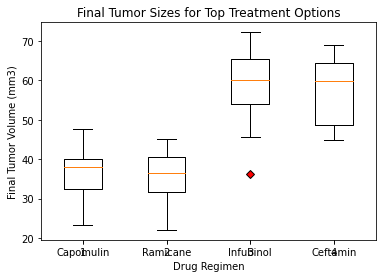

In [14]:
# Generate a data frame for mice with each top treatment
capomulin_df = merged_by_last_timepoint.loc[merged_by_last_timepoint["Drug Regimen"] == "Capomulin"]
capomulin_tumor = capomulin_df["Tumor Volume (mm3)"]

ramicane_df = merged_by_last_timepoint.loc[merged_by_last_timepoint["Drug Regimen"] == "Ramicane"]
ramicane_tumor = ramicane_df["Tumor Volume (mm3)"]

infubinol_df = merged_by_last_timepoint.loc[merged_by_last_timepoint["Drug Regimen"] == "Infubinol"]
infubinol_tumor = infubinol_df["Tumor Volume (mm3)"]

ceftamin_df = merged_by_last_timepoint.loc[merged_by_last_timepoint["Drug Regimen"] == "Ceftamin"]
ceftamin_tumor = ceftamin_df["Tumor Volume (mm3)"]

# Create dictionary of desired outlier properties
red_diamond = dict(markerfacecolor='r', marker='D')

# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
all_data = [capomulin_tumor,ramicane_tumor,infubinol_tumor,ceftamin_tumor]
fig1, ax1 = plt.subplots()

# Set title and labels
ax1.set_title("Final Tumor Sizes for Top Treatment Options")
plt.xticks([1, 2, 3, 4], ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"])
plt.xlabel("Drug Regimen")
plt.ylabel("Final Tumor Volume (mm3)")
ax1.boxplot(all_data, flierprops=red_diamond)

## Line and Scatter Plots

(21.34359787, 47.0)

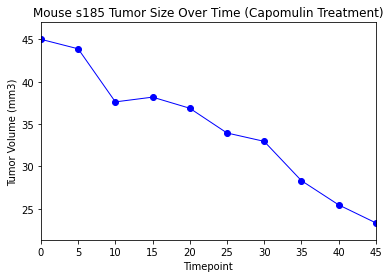

In [15]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
# Create data frame for only mice treated with Capomulin to generate an array of unique mice
capomulin_only_df = mouse_df.loc[mouse_df["Drug Regimen"] == "Capomulin"]
capomulin_mice = capomulin_only_df["Mouse ID"].unique()

# Identify first mouse in the table treated with Capomulin and create data frame with its data
first_cap_mouse = capomulin_mice[0]
first_cap_mouse_df = mouse_df.loc[mouse_df["Mouse ID"] == first_cap_mouse]

# Identify x-axis and y-axis values
timepoints = first_cap_mouse_df["Timepoint"]
tumor_size = first_cap_mouse_df["Tumor Volume (mm3)"]

# Generate and show the line plot
plt.plot(timepoints, tumor_size, linestyle="solid", color="blue", linewidth=1, marker="o")

# Set title, labels, and limits
plt.title(f"Mouse {first_cap_mouse} Tumor Size Over Time (Capomulin Treatment)")
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume (mm3)")
plt.xlim(first_cap_mouse_df["Timepoint"].min(), first_cap_mouse_df["Timepoint"].max())
plt.ylim(first_cap_mouse_df["Tumor Volume (mm3)"].min() - 2, first_cap_mouse_df["Tumor Volume (mm3)"].max() + 2)

Text(0, 0.5, 'Tumor Volume (mm3)')

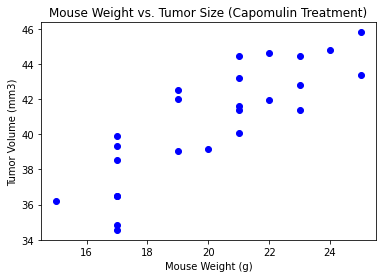

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
# Reduce Capomulin-only data frame to only relevant information
capomulin_only_df = capomulin_only_df[["Mouse ID","Weight (g)","Tumor Volume (mm3)"]]

# Group data frame by Mouse ID, and generate the average of Tumor Volume for each
cap_groupby_mouse = capomulin_only_df.groupby('Mouse ID').mean()

# Identify x-axis and y-axis values
weight = cap_groupby_mouse['Weight (g)']
tumor_size = cap_groupby_mouse['Tumor Volume (mm3)']

# Generate and show the line plot
plt.scatter(weight, tumor_size, color="blue")

# Set title and labels
plt.title("Mouse Weight vs. Tumor Size (Capomulin Treatment)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")

## Correlation and Regression

The correlation between both factors is 0.84


Text(0, 0.5, 'Tumor Volume (mm3)')

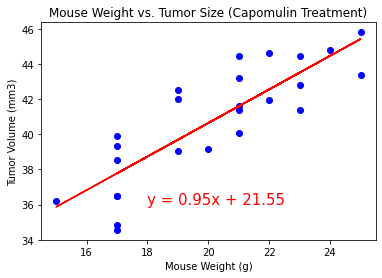

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Calculate correlation coefficient
correlation = st.pearsonr(weight,tumor_size)
print(f"The correlation between both factors is {round(correlation[0],2)}")

# Calculate linear regression and display on plot
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(weight, tumor_size)
regress_values = weight * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(weight, tumor_size, color="blue")
plt.plot(weight,regress_values,"r-")
plt.annotate(line_eq,(18,36),fontsize=15,color="red")

# Set title and labels
plt.title("Mouse Weight vs. Tumor Size (Capomulin Treatment)")
plt.xlabel("Mouse Weight (g)")
plt.ylabel("Tumor Volume (mm3)")